# CPE 4040 Spring 22 Final: Machine Learning Assignment
## Johnny Lozano

In this semi-guided assignment, you will analyze two datasets for Machine Learning modeling: one for logistic regression and one for linear regression.
 
### General guidelines:
 * Do each part of the assignment in a clean and logical manner.
 * Make comments and offer insight on your codes. Coding with no or poor comments will result in point deduction.
 * This is an individual assignment.
 * No plagiarism: you are encouraged to do research, however, do your own work. Do not copy-and-paste other people's work.    

### Submission:
 * Submit this notebook file and the pdf version - remember to add your name in the filename.
 * Deadline: 11:59 pm, 5/6 (Friday)

## Part 1: Logistic Regression - The PIMA Diabetic Data Set (50 Points)

We performed exploratory analyses on this dataset in Midterm 2. 

#### In this part, you will build a diabetic outcome prediction model based on **Logistic Regression**.

#### The filename, "diabetes_clean.csv", is an updated version of the dataset after some cleaning. Do not use the original dataset.

The dataset contains the following features/columns:

 * Pregnancies: Number of times pregnant
 * Glucose: Plasma glucose concentration at 2 hour in an oral glucose tolerance test (mg/dL)
 * BloodPressure: Diastolic blood pressure (mm Hg)
 * SkinThickness: Triceps skin fold thickness (mm)
 * Insulin: 2-hour serum insulin level (mu U/ml)
 * BMI: Body mass index (weight in kg/(height in m)^2)
 * DiabetesPedigreeFunction: a function which scores likelihood of diabetes based on family history
 * Age: age of patients (years)
 * Outcome: class variable 0 or 1 indicating disease (0: non-diabetic, 1: diabetic)


### Import the libraries you need for the analysis

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Data
 1. Load the dataset in a pandas DataFrame
 2. Examine the basic statistics for each column (Hint: use df.describe( ))

In [242]:
df = pd.read_csv('diabetes_clean.csv')

In [243]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 2: Find Correlations Between Column Data

 1. Calculate the correlation matrix of the dataset.
 2. Plot a **heatmap** (showing the coefficients) for the resulting correlation matrix.

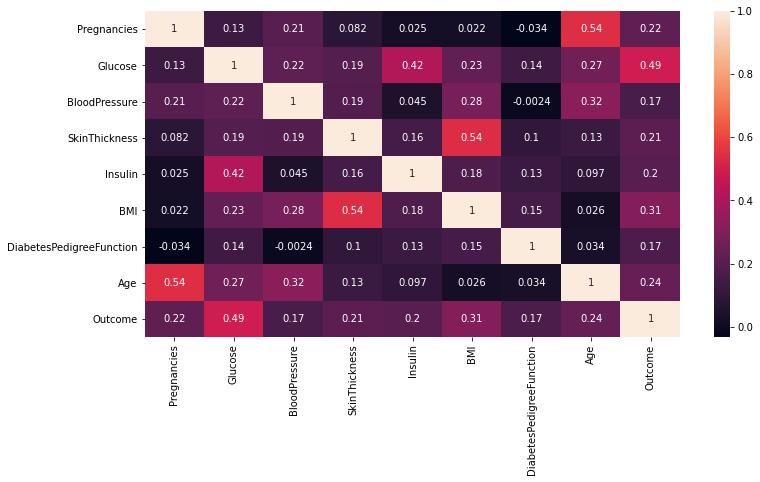

In [244]:
corr = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.show()

 3. Write a code to find the top 3 column features that have the highest correlation with the "Outcome" column.
 4. Create a **pairplot** for only the three column features identified in 3. The purpose is to observe how those features are correlated to each other.

In [282]:
corr['Outcome'].nlargest(4)[1:4]

Glucose    0.492782
BMI        0.312038
Age        0.238356
Name: Outcome, dtype: float64

<Figure size 864x432 with 0 Axes>

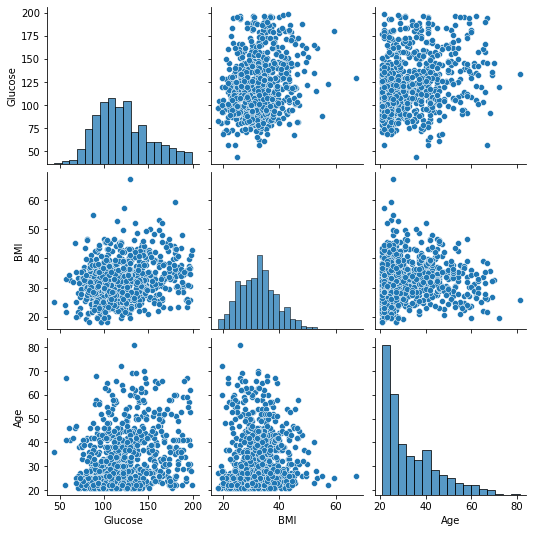

In [283]:
df_1 = df[['Glucose','BMI','Age']]

plt.figure(figsize=(12,6))
sns.pairplot(df_1)
plt.show()

## Step 3: Regression Model and Outcome Prediction

### Step 3.1: Train-Test Split

**Since we want to classify whether a patient is diabetic or not, the output (target) will be the "Outcome" column. The rest of the columns will be the input (features). So you will drop the Outcome column from the dataset and make it X and pick the Outcome column and make it y.**

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [269]:
# Set up X (features) and y (target)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Step 3.1.1: Normalizing Data in X (Features) 
#### This step was not covered in class, however, it can help the performace, as well as yield a better interpretation of the regression model. 
#### Follow the instruction below:
   * Calcuate the means and standard deviation for each column of **X** 
   * Normalize each column of **X** by the equation: **X = $\frac{(X - means)}{stdev}$**

In [270]:
# Normalize the data with means and standard deviation 
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

print (stds)
X = (X - means)/stds

Pregnancies                  3.367384
Glucose                     30.418463
BloodPressure               12.088764
SkinThickness                8.785496
Insulin                     86.326802
BMI                          6.870699
DiabetesPedigreeFunction     0.331113
Age                         11.752573
dtype: float64


### Step 3.1.2: Split the dataset into training set and testing set using proper Sklearn package. 
#### Use a test size of 30% and your own arbitrary number for random_state.

In [277]:
# Split test and train data with test_data = 30% and random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [263]:
X_train.shape

(537, 8)

In [272]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.011728,0.031197,0.028857,0.005080,0.015363,0.029069,0.014473,-0.027310
std,0.998435,1.020994,1.029901,0.949695,1.044869,1.030674,1.024759,0.980506
min,-1.141852,-2.552931,-4.002619,-2.402605,-1.467353,-2.074783,-1.189553,-1.041549
25%,-0.844885,-0.711944,-0.693761,-0.467597,-0.239461,-0.692100,-0.685193,-0.786286
50%,-0.250952,-0.120198,-0.031990,-0.012301,-0.181541,-0.022590,-0.277477,-0.360847
75%,0.639947,0.701671,0.629782,0.329171,-0.181541,0.632365,0.429230,0.575118
max,3.906578,2.542658,4.104082,3.857714,6.988885,5.042397,5.883565,4.063716


### Step 3.2: Train and Fit Your Model

**Use Sklearn package on the training data and obtain the prediction model.**

In [278]:
# Make the Regression model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

### Step 3.3: Prediction and Model Evaluation
### Step 3.3.1. Use Sklearn package to predict the outcomes on the test data. 
#### How many positive predictions (i.e., diabetic) from the testing data?

In [279]:
prediction = lr_model.predict(X_test)

print("There are %s predicted positive outcomes for diabetic."%prediction.sum())

There are 63 predicted positive outcomes for diabetic.


<h3>Step 3.3.2. Use Sklearn package to create the Confusion Matrix.</h3>
<h4>What are the values of TP (True Positive), TN (True Negative), FP (False Positive) and FN (False Negative)? As a reminder, "positive" means "diabetic" and vice versa. </h4>

In [280]:
confusion = confusion_matrix(y_test,prediction, labels=[1,0])
print(confusion)

TP = confusion[0,0]
TN = confusion[1,1]
FN = confusion[0,1]
FP = confusion[1,0]

print('\nTP = ',TP,'\nTN = ',TN,'\nFP = ',FP,'\nFN = ',FN )

[[ 48  37]
 [ 15 131]]

TP =  48 
TN =  131 
FP =  15 
FN =  37


<h3>Step 3.3.3. Use Sklearn package to create the Classification Report.</h3>
<h4>What are the values of Accuracy, Precision, Recall, and Specificity? (You may want to refer back to the lecture note for the definition)</h4>

In [281]:
print(classification_report(y_test,prediction))

# Values for each using confusion matrix.

accuracy = (TP + TN)/len(X_test)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
specificity = (TN)/(TN+FP)

print('Accuracy =',accuracy, '\nPrecision = ',precision, '\nRecall = ',recall, '\nSpecificity = ',specificity)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

Accuracy = 0.7748917748917749 
Precision =  0.7619047619047619 
Recall =  0.5647058823529412 
Specificity =  0.8972602739726028


## Step 4: Interpreting the Prediction Model

**To get a better sense of the logistic regression model, we will retrieve the regression coefficients and visualize which features have greater impact on the prediction outcome.**

### Step 4.1. Follow the instruction:
 1. Use "coeff = list(lr_model.coef_[0])" to obtain the regression coefficients, where lr_model is the name of your model.
 2. Make a **horizontal bar chart** with the feature lables (i.e., Glucose, BMI, etc.) in the y-axis and the coefficients in the x-axis. **Order the coefficents in descending order**.

In [258]:
# coeff = list(lr_model.coef_[0])
coeff = list(lr_model.coef_[0])
label = df.columns.drop('Outcome')

# create a pandas Series for the label-coefficient pairs
coeff_label = pd.Series(coeff, label)
# sort the coefficients in descending order
coeff_label.sort_values(inplace=True)
print (coeff_label)

BloodPressure              -0.135790
Insulin                    -0.058188
SkinThickness              -0.057924
DiabetesPedigreeFunction    0.189325
Age                         0.227732
Pregnancies                 0.316339
BMI                         0.716964
Glucose                     1.008079
dtype: float64


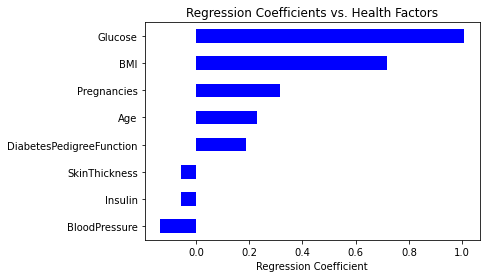

In [81]:
ax = coeff_label.plot.barh(x='Regression Coefficient', color='blue')
ax.set_xlabel('Regression Coefficient')
ax.set_title('Regression Coefficients vs. Health Factors')

plt.show()

### Step 4.2: Based on the observation on the coefficients and the chart, please answer the following questions:

**Q1: What are the top three factors that have significant influence on the prediction outcome?**

#### $\color{red}{\text{Based on the coefficient charts, the top three factors are Glucose, BMI and Pregnancies.}}$

**Q2: Do those three factors also have high correlation coefficients with the outcome?**

#### $\color{red}{\text{Looking back to the heatmap, the above three factors are also among the top four in correlation coefficients. Glucose appears to have the strongest correlation.}}$

## Part 2: Linear Regression - Medical Expense Prediction (50 Points) 

Health insurance compaines develop models aiming to accurately forecast medical expenses for the insured population.
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. 
Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more 
likely among smokers than non-smokers, and heart disease may be more likely among the obese.

#### The filename, "insurance.csv", is the dataset for this analysis.

The dataset contains the following features/columns:

 * **age**: The age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
 * **sex**: The policy holder’s gender, either male or female.
 * **bmi**: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height.
 * **children**: The number of children/dependents covered by the insurance plan.
 * **smoker**: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
 * **region**: The beneficiary’s place of residence in the US, divided into four geographic regions: northeast, southeast, southwest, or northwest.
 * **charges**: The medical expense charged to the medical plan in a calendar year. This is the **target** column. 


## Step 1: Data Preparation and Cleaning

Perform the following tasks:
 1. Load the dataset in a data frame
 2. Examine the dataset attributes (index, columns, range of values) and basic statistics 
 3. Handle missing and invalid data

In [303]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [286]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### By observing the df.describe() result, this appears to be a clean dataset. 
#### Let's do a quick sanity check.

In [287]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Step 2: Exploratory Data Analysis

In this section, you will examine two of the likely leading indicators for medical expenses: smoking and bmi.

### Q2.1: Create a boxplot that compares the "charges" for "smoker" vs. "non-smoker".   

Please make comments on the impact of smoking on the medical charges. 

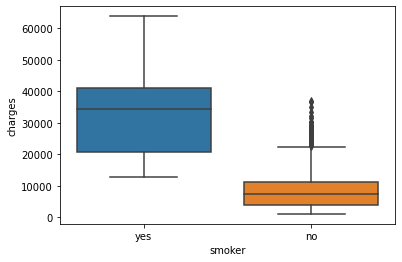

In [288]:
sns.boxplot(x=df['smoker'], y=df['charges'])
plt.show()

#### $\color{red}{\text{Smokers appear to incur much higher medical charges vs. non-smokers.}}$

### Q2.2: Create a bar chart that compares the average medical charges for 6 different BMI ranges.

BMI range definition:
 * Below 18.5: Underweight
 * 18.5–24.9: Normal weight
 * 25.0–29.9: Pre-obesity
 * 30.0–34.9: Obesity class I
 * 35.0–39.9: Obesity class II
 * Above 40: Obesity class III

Please make comments on the impact of BMI (obesity) on the medical charges. 

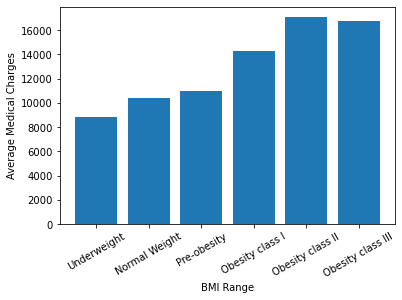

In [291]:
# Create Dict with all average values for each BMI Range
bmi_charges = {"Underweight": df[df['bmi'] < 18.5]["charges"].mean(),
             "Normal Weight": df[(df['bmi'] >= 18.5) & (df['bmi']<=24.9)]["charges"].mean(),
             "Pre-obesity": df[(df['bmi'] >= 25) & (df['bmi']<=29.9)]["charges"].mean(),
             "Obesity class I": df[(df['bmi'] >= 30) & (df['bmi']<=34.9)]["charges"].mean(),
             "Obesity class II":df[(df['bmi'] >= 35) & (df['bmi']<=39.9)]["charges"].mean(),
             "Obesity class III": df[df['bmi'] > 40]["charges"].mean()}


# Create Bar Chart showing values
plt.bar(bmi_charges.keys(), bmi_charges.values())
plt.xlabel("BMI Range")
plt.ylabel("Average Medical Charges")
plt.xticks(rotation = 30)
plt.show()

#### $\color{red}{\text{Medical charges tend to trend higher with increasing BMIs.}}$

### Q2.3: Calculate the correlation matrix for the numerical column data and plot a heatmap.

For this exercise, you will remove the three **categorical** variables (sex, smoker, region) first. 

**Are the remaining column features highly correlated with each?** 

In [292]:
print(df.columns)
df_1 = df.drop(['sex','smoker','region'], axis=1)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


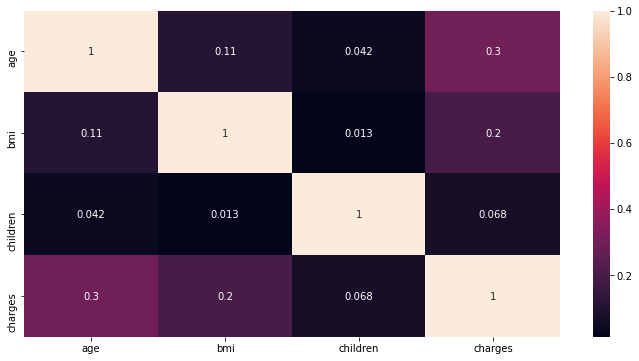

In [144]:
corr = df_1.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.show()

#### $\color{red}{\text{"Age", "bmi" and "Children" have low correlation with each other.}}$

## Step 3: Regression Model and Outcome Prediction

In this section, you will use **linear regression** to create a prediction model for the medical charges.

### Step 3.1: Converting Categorical Features

There are three categorial features in this dataset (sex, smoker, and region). We are interested to learn how **gender** and **smoker** impact the prediction model and, therefore, we need to first convert those two categorial variables into **"dummy" numerical variables**. 

<h3> First, remove the "region" column since we are not interested in this feature.</h3>

In [304]:
df.drop('region', axis=1, inplace=True)

### Second, use pd.get_dummies( ) to convert both "sex" and "smoker" columns. 
### Remember to use "drop_first = True" option to remove the redundant column. 

In [305]:
df = pd.get_dummies(df, drop_first=True)

### Now the dataset should have the following columns:'age','bmi',children','sex_male','smoker_yes' and 'charges' 
#### Show the first 5 lines of the dataset

In [306]:
### Now the dataset should have the following columns:'age','bmi',children','sex_male','smoker_yes' and 'charges' 
### Show the first 5 lines of the dataset
df.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


### Step 3.2: Train-Test Split

**Since we want to predict the medical charges, the output (target) will be the "charges" column. The rest of the columns will be the input (features). So you will drop the "charges" column from the dataset and make it X and pick the "charges" column and make it y.**

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [308]:
# Set up X (features) and y (target)
X = df.drop('charges', axis=1)
y = df['charges']

### Split the dataset into training set and testing set using proper Sklearn package. 
#### Use a test size of 30% and your own arbitrary number for random_state.

In [309]:
# Split test and train data with test_data = 30% and random_state = 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Step 3.3: Train and Fit Your Model
**Use Sklearn package on the training data and obtain the linear prediction model.**

In [310]:
lm = LinearRegression()

In [311]:
lm.fit(X_train,y_train)

LinearRegression()

### Step 3.4: Prediction and Model Evaluation
### Step 3.4.1. Use Sklearn package to predict the outcomes on the test data. 
**Create a scatter plot for predicted value (y-axis) vs. actual value (x-axis). Properly label the two axes.**

In [312]:
predictions = lm.predict(X_test)

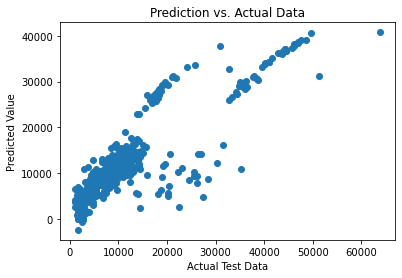

In [313]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Value")
plt.title('Prediction vs. Actual Data')
plt.show()

### Step 3.4.2: Use Sklearn module to calcualte the following evaluation metrics.
 * Mean Absolute Error (MAE)
 * Mean Squared Error (MSE)
 * Root Mean Squared Error (RMSE) 
 * R-Square (r2)

In [314]:
print('MAE: %.f'%metrics.mean_absolute_error(y_test, predictions))
print('MSE: %.f'%metrics.mean_squared_error(y_test, predictions))
print('RMSE: %.f'%np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4010
MSE: 33693652
RMSE: 5805


In [315]:
from sklearn.metrics import r2_score
print("R2: %.4f"%metrics.r2_score(y_test, predictions))

R2: 0.7601


## Step 4: Interpreting the Prediction Model

### Step 4.1. Print out the linear regression equaiton coefficients and constant
 * **lm.coef_** is the linear regression coefficients, where lm is the name of your model
 * **lm.intercept_** is the constant of the linear regression equation
 * Create a pandas DataFrame that takes **lm_coef_** as the data and column lables of X as the index. Print the DataFrame. 

In [316]:
# print the intercept
const = lm.intercept_
print (const)

-12528.087428524863


In [317]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns, columns=['coefficient'])
coeff_df

,coefficient
age,241.869312
bmi,355.027129
children,494.185696
sex_male,53.985556
smoker_yes,23448.982163


### Step 4.2.: Based on the linear regression equation, answer the following questions:
<h4> Q1. Does gender have much an impact on the total medical charge, if all else being equal? Why or why not?

#### $\color{red}{\text{All other factors being equal, the male will pay \$54 more than the female, which is not a major difference.}}$

<h4>Q2. Predict the medical charges for a male customer with the following profile: age 40, 3 children, BMI 25, and smoking. Write a code to perform the calculation.</h4>

In [318]:
customer = np.array([40, 25, 3, 1, 1])
charges = np.dot(lm.coef_, customer) + const
print (charges)

31007.888074627226


## <span style="color:purple">Wonderful, you are done! It has been a fun semester. Have a great summer!